# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
%matplotlib inline

In [2]:
current_working_dir = os.getcwd()
print(current_working_dir)

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\analysis


In [3]:
os.chdir("..")
current_working_dir = os.getcwd()
print(current_working_dir)
data = pd.read_csv(r'output/measures/input_2019-01-01.csv.gz')
data

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit


,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
0,2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,4,0,0,0,0,0,0,8017
1,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-01,...,0,0,0,0,0,0,0,5,0,434
2,2019-10,NaN,NaN,NaN,NaN,2021-06-09,NaN,NaN,NaN,NaN,...,0,0,0,2,0,0,0,0,0,6896
3,2019-11,NaN,NaN,2018-08,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,4,0,0,6386
4,2019-05,NaN,NaN,NaN,NaN,2019-04-27,NaN,NaN,2021-10-05,NaN,...,0,0,0,3,0,0,0,0,0,6508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-05,NaN,NaN,NaN,2018-08,NaN,NaN,NaN,NaN,NaN,...,0,0,0,5,0,0,0,5,6,3336
996,2020-05,NaN,NaN,2018-05,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,4,3,0,0,0,0,0,6265
997,2019-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-26,NaN,...,0,0,0,0,0,0,0,0,0,8736
998,2021-04,NaN,2020-01,NaN,NaN,2019-05-28,NaN,NaN,NaN,NaN,...,5,0,0,0,4,0,0,0,0,9174


In [6]:
#read csv.gz files and concatenate them
#path2 = os.getcwd()+'\output\measures'
##path1 = r'C:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures'
##all_files = glob.glob(os.path.join(path1, "*.csv.gz"))
##print(path1)

##data = pd.concat((pd.read_csv(f) for f in all_files))
##data

In [4]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3', 'uti_date_4',
       'lrti_date_1', 'lrti_date_2', 'lrti_date_3', 'lrti_date_4', 'age',
       'age_cat', 'sex', 'practice', 'region', 'msoa', 'imd', 'bmi',
       'ethnicity', 'smoking_status', 'gp_count', 'flu_vaccine_tpp',
       'flu_vaccine', 'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         950 non-null    object 
 1   smoking_status_date                       100 non-null    object 
 2   most_recent_unclear_smoking_cat_date      100 non-null    object 
 3   flu_vaccine_med                           100 non-null    object 
 4   flu_vaccine_clinical                      100 non-null    object 
 5   sgss_positive                             100 non-null    object 
 6   covrx1_dat                                0 non-null      float64
 7   covrx2_dat                                0 non-null      float64
 8   died_date                                 100 non-null    object 
 9   uti_date_1                                100 non-null    object 
 10  uti_date_2                           

In [6]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
count,950,100,100,100,100,100,0.0,0.0,100,100,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,34,32,33,12,7,96,NaN,NaN,81,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-10,2021-04,2019-06,2018-08,2018-09,2019-09-29,NaN,NaN,2021-10-13,2020-11-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,8,6,19,21,2,NaN,NaN,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.896000,0.907000,0.90300,0.901000,0.885000,0.908000,0.896000,0.916000,0.888000,5095.952000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852732,1.874531,1.86039,1.855975,1.834977,1.871106,1.851651,1.881085,1.825593,2917.744066
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2549.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5072.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7650.250000


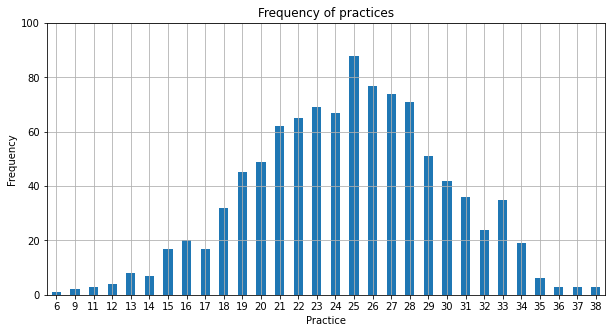

In [7]:
#data['practice'].value_counts().sort_index()

data['practice'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Practice')
plt.ylabel('Frequency')
plt.title('Frequency of practices')
#plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()
#plt.savefig(r'output/hospitalisation_risk/practices.png', edgecolor='none')
plt.show()

F    504
M    496
Name: sex, dtype: int64


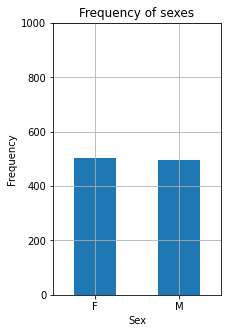

In [8]:
#data['sex'].value_counts().sort_index()

data['sex'].value_counts().sort_index().plot(kind='bar', figsize=(3, 5), rot=0)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of sexes')
#plt.xlim(0, 100)
plt.ylim(0, 1000)
plt.grid()
print(data['sex'].value_counts().sort_index())
#plt.savefig(r'output/hospitalisation_risk/sexes.png', edgecolor='none')
plt.show()

0-4      120
15-24    132
25-34    101
35-44    104
45-54     94
5-14      98
55-64    117
65-74    121
75+      113
Name: age_cat, dtype: int64


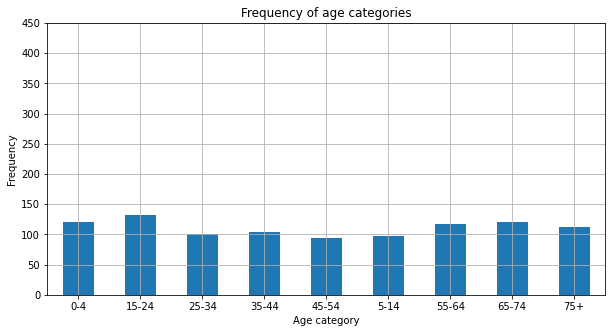

In [9]:
#data['age_cat'].value_counts().sort_index()

data['age_cat'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Age category')
plt.ylabel('Frequency')
plt.title('Frequency of age categories')
#plt.xlim(0, 100)
plt.ylim(0, 450)
plt.grid()
print(data['age_cat'].value_counts().sort_index())
#plt.savefig(r'output/hospitalisation_risk/age_categories.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


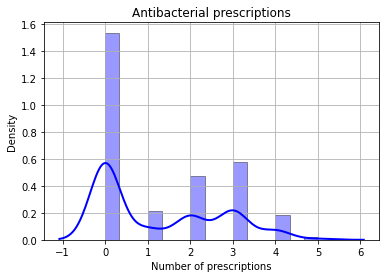

In [10]:
sns.distplot(data['antibacterial_prescriptions'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Number of prescriptions')
#plt.ylabel('Frequency')
plt.title('Antibacterial prescriptions')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
#plt.savefig(r'output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
plt.show()

In [14]:
data.columns

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
0,2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,4,0,0,0,0,0,0,8017
1,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-01,...,0,0,0,0,0,0,0,5,0,434
2,2019-10,NaN,NaN,NaN,NaN,2021-06-09,NaN,NaN,NaN,NaN,...,0,0,0,2,0,0,0,0,0,6896
3,2019-11,NaN,NaN,2018-08,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,4,0,0,6386
4,2019-05,NaN,NaN,NaN,NaN,2019-04-27,NaN,NaN,2021-10-05,NaN,...,0,0,0,3,0,0,0,0,0,6508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-05,NaN,NaN,NaN,2018-08,NaN,NaN,NaN,NaN,NaN,...,0,0,0,5,0,0,0,5,6,3336
996,2020-05,NaN,NaN,2018-05,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,4,3,0,0,0,0,0,6265
997,2019-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-26,NaN,...,0,0,0,0,0,0,0,0,0,8736
998,2021-04,NaN,2020-01,NaN,NaN,2019-05-28,NaN,NaN,NaN,NaN,...,5,0,0,0,4,0,0,0,0,9174


In [13]:
data['bmi']

0      42.220886
1      41.363434
2      45.631950
3      40.945482
4      23.551113
         ...    
995    39.933850
996    50.292001
997    35.837566
998    22.666703
999    47.727428
Name: bmi, Length: 1000, dtype: float64